# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Gusti Agung Anom Widyartha
- **Email:** m014d4ky2554@bangkit.academy
- **ID Dicoding:** anomwdyt

## 1. Pendahuluan


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

## 2. Menentukan Pertanyaan Bisnis

- Bagaimana peforma Bike Sharing System dalam beberapa tahun terakhir?
- Musim apa yang memiliki nilai pengguna rental sepeda paling tinggi pada Bike Sharing System?
- Apakah ada pengaruh suhu terhadap rental sepeda pada Bike Sharing System?

## 3. Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling

### 4.1 Gathering Data

In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/AnomBangkit/Proyek-Analisis-Data/main/Data/hour.csv")
hour_df.head()                      

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Keterangan Data : 
 - instant : record index
 - dteday : date
 - season : season (1: spring, 2: summer, 3: fall, 4: winter)
 - yr : year (0: 2011, 1: 2012)
 - mnth : month(1-12)
 - hr : hour (1-23)
 - holiday : (weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule))
 - weekday : day of week
 - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 - weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
 - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
 - hum: Normalized humidity. The values are divided to 100 (max)
 - windspeed: Normalized wind speed. The values are divided to 67 (max)
 - casual: count of casual users
 - registered: count of registered users
 - cnt: count of total rental bikes

### 4.2 Assessing Data

memastikan tipe data sudah sesuai menggunakan metode info()

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memastikan missing value pada data hour_df

In [4]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa ringkasan parameter statistik

In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


memeriksa duplikasi pada data

In [6]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Data hour.csv tidak menunjukkan missing value dan duplicate data. Namun, pada dteday terdapat kesalahan tipe data yang seharusnya merupakan tipe data datetime.

### 4.3 Cleaning Data

Cleaning data yang dilakukan antara lain mengganti tipe data, mengganti nilai data sesuai keterangan seperti pada kolom season dan yr, dan mengembalikan normalisasi temperature

- mengganti tipe data dteday

In [7]:
hour_df["dteday"]= pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Mengganti season sesuai dengan keterangan

In [8]:
def find_season(season):
    season_string = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)
    
hour_df['season'] = season_list

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- mengganti yr, mnth, dan weekday sesuai dengan keterangan

In [10]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df['yr'] = hour_df['dteday'].dt.year

In [11]:
hour_df.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,Spring,2011,January,5,0,Saturday,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,Spring,2011,January,6,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,Spring,2011,January,7,0,Saturday,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,Spring,2011,January,8,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,Spring,2011,January,9,0,Saturday,0,1,0.32,0.3485,0.76,0.0000,8,6,14


- Mengembalikan normalisasi temperature dalam celcius

In [12]:
hour_df[["temp", "atemp"]].describe()

,temp,atemp
count,17379.000000,17379.000000
mean,0.496987,0.475775
std,0.192556,0.171850
min,0.020000,0.000000
25%,0.340000,0.333300
50%,0.500000,0.484800
75%,0.660000,0.621200
max,1.000000,1.000000


In [13]:
hour_df["temp"]= hour_df["temp"].mul(41)
hour_df["atemp"]= hour_df["atemp"].mul(50)

In [14]:
hour_df[["temp", "atemp"]].describe()

,temp,atemp
count,17379.000000,17379.000000
mean,20.376474,23.788755
std,7.894801,8.592511
min,0.820000,0.000000
25%,13.940000,16.665000
50%,20.500000,24.240000
75%,27.060000,31.060000
max,41.000000,50.000000


Kemudian data yang sudah dibersihkan disimpan

In [15]:
hour_df.to_csv("Cleaned_hour_dataset.csv", index=False)

## 5. Exploratory Data Analysis (EDA)

### Eksplorasi parameter statistik

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,20.376474,23.788755,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,13.940000,16.665000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,1.000000,20.500000,24.240000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,2.000000,27.060000,31.060000,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,4.000000,41.000000,50.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat dilihat pada tabel tersebut bahwa musim yang paling banyak muncul di data adalah fall. Kemudian, kita akan melihat hubungan antara cnt dengan season, year, month, weekday, dan hour

### cnt vs season

In [17]:
hour_df.groupby(by="season").agg({
    "instant" : "nunique",
    "cnt" : ["mean", "std", "min", "max"]
})

instant         cnt                     
       nunique        mean         std min  max
season                                         
Fall      4496  236.016237  197.711630   1  977
Spring    4242  111.114569  119.224010   1  801
Summer    4409  208.344069  188.362473   1  957
Winter    4232  198.868856  182.967972   1  967

C:\Users\User\AppData\Local\Temp\ipykernel_9960\1805660452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


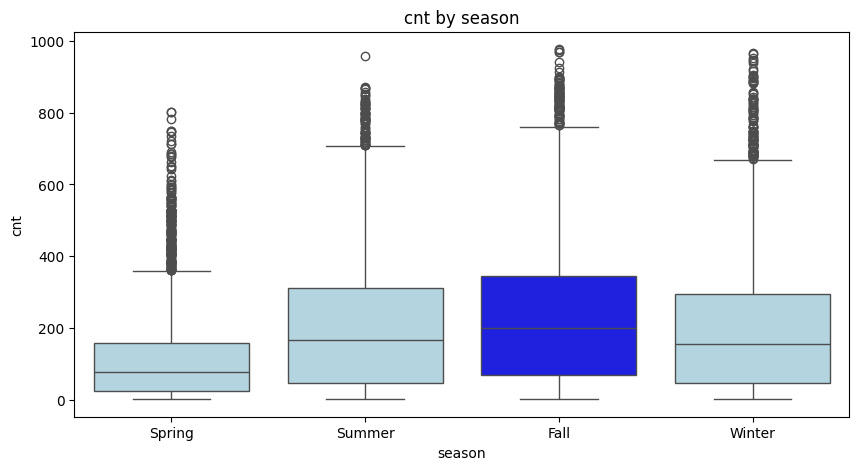

In [93]:
plt.subplots(figsize=(10,5))

#Create a boxplots using the sns.bloxpot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=hour_df,
    palette=["lightblue", "lightblue", "blue", "lightblue"] 
)

#add labels
plt.xlabel("season")
plt.ylabel("cnt")
plt.title("cnt by season")

#show the plot
plt.show()


__Insight__  
pada boxplot terlihat bahwa musim "fall" memiliki record index tertinggi pada data dan rata-rata jumlah sewa tertinggi, Kemudian kita akan lihat distribusi cnt terhadap tahun, bulan, hari, dan jam

### cnt vs year

In [19]:
hour_df.groupby(by="yr").cnt.mean()

yr
2011    143.794448
2012    234.666361
Name: cnt, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9960\1507935010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


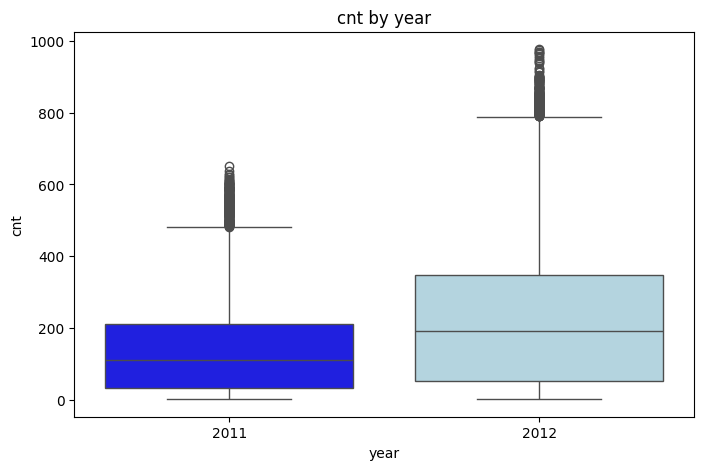

In [20]:
plt.subplots(figsize=(8,5))

#Create a boxplots using the sns.bloxpot() function
sns.boxplot(
    x="yr",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"] 
)

#add labels
plt.xlabel("year")
plt.ylabel("cnt")
plt.title("cnt by year")

#show the plot
plt.show()


__Insight__  
Pada tahun 2012 rata-rata sewa meningkat hampir 2 kali lipat daripada tahun 2011

### cnt vs month

In [21]:
hour_df.groupby(by="mnth").cnt.mean().sort_values(ascending=False)

mnth
September    240.773138
June         240.515278
August       238.097627
July         231.819892
May          222.907258
October      222.158511
April        187.260960
November     177.335421
March        155.410726
December     142.303439
February     112.865026
January       94.424773
Name: cnt, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9960\1204671218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_9960\1204671218.py:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


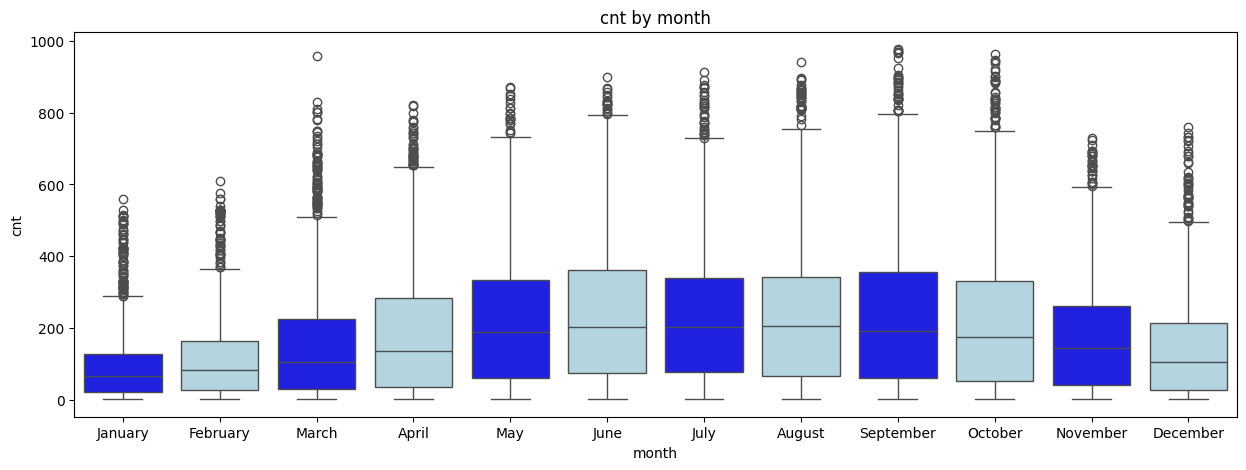

In [89]:
plt.subplots(figsize=(15,5))

#Create a boxplots using the sns.bloxpot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

#add labels
plt.xlabel("month")
plt.ylabel("cnt")
plt.title("cnt by month")

#show the plot
plt.show()


__Insight__  
rata-rata sewa paling tinggi saat bulan september

### cnt vs weekday

In [23]:
hour_df.groupby(by="weekday").cnt.mean().sort_values(ascending=False)

weekday
Thursday     196.436665
Friday       196.135907
Tuesday      191.238891
Wednesday    191.130505
Saturday     190.209793
Monday       183.744655
Sunday       177.468825
Name: cnt, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9960\4027339424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_9960\4027339424.py:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


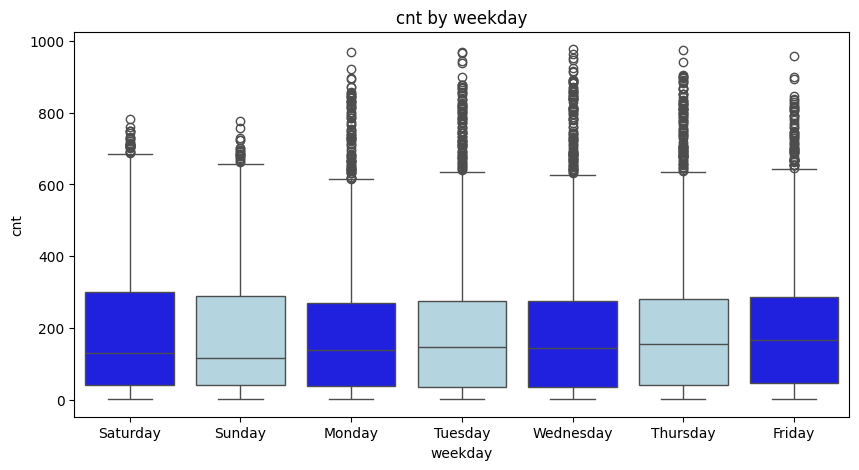

In [88]:
plt.subplots(figsize=(10,5))

#Create a boxplots using the sns.bloxpot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"] 
)

#add labels
plt.xlabel("weekday")
plt.ylabel("cnt")
plt.title("cnt by weekday")

#show the plot
plt.show()


__insight__  
rata-rata sewa paling tinggi saat hari kamis namun tidak ada perbedaan yang signifikan dengan hari lainnya

### cnt vs hour

In [25]:
hour_df.groupby(by="hr").cnt.mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9960\628701294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_9960\628701294.py:4: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


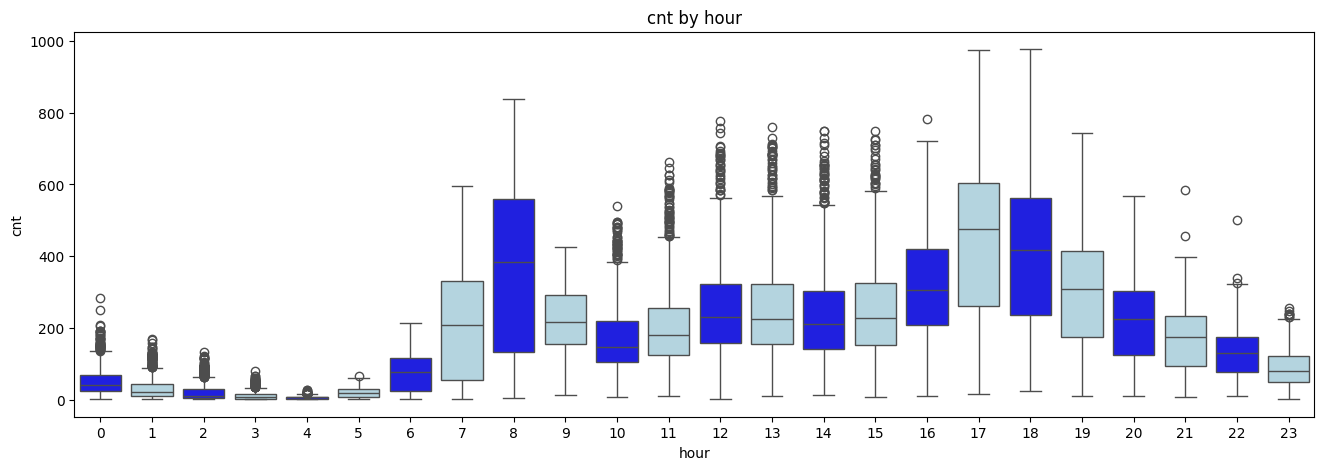

In [26]:
plt.subplots(figsize=(16,5))

#Create a boxplots using the sns.bloxpot() function
sns.boxplot(
    x="hr",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"] 
)

#add labels
plt.xlabel("hour")
plt.ylabel("cnt")
plt.title("cnt by hour")

#show the plot
plt.show()


__Insight__  
- rata-rata sewa bernilai kecil saat tengah malam
- rata-rata sewa mulai naik pada pagi hari pukul 6 hingga pukul 8
- setelah itu rata-rata sewa turun kemudian kembali naik hingga puncaknya pada pukul 17
- kemudian menurun hingga tengah malam

### Korelasi Temperatur dengan cnt

In [27]:
corr_var=["cnt","temp", "atemp"]
corr_df= hour_df[corr_var]

corr_df.head(10)

,cnt,temp,atemp
0,16,9.84,14.395
1,40,9.02,13.635
2,32,9.02,13.635
3,13,9.84,14.395
4,1,9.84,14.395
5,1,9.84,12.880
6,2,9.02,13.635
7,3,8.20,12.880
8,8,9.84,14.395
9,14,13.12,17.425


sebelum melihat korelasi antara temperatur dan cnt, hal yang dilakukan terlebih dahulu adalah melihat distribusi data temp, atemp, dan cnt

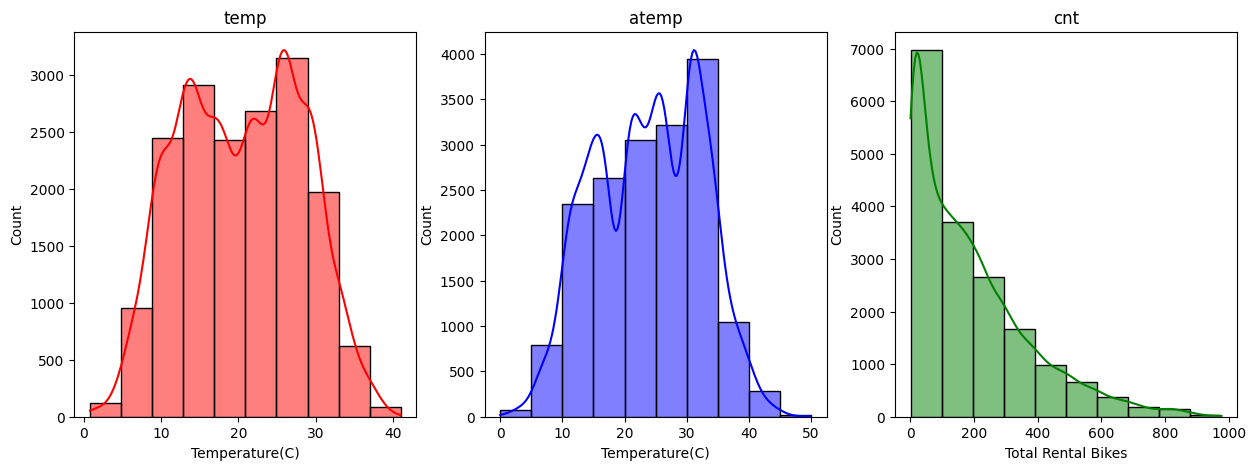

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

#make scatter plot
sns.histplot(data=corr_df, x="temp", ax=axs[0], kde=True, bins=10, color="red")
sns.histplot(data=corr_df, x="atemp", ax=axs[1], kde=True, bins=10, color="blue")
sns.histplot(data=corr_df, x="cnt", ax=axs[2], kde=True, bins=10, color="green")

#set title
axs[0].set_title("temp")
axs[1].set_title("atemp")
axs[2].set_title("cnt")

# give label
for i in range(3):
    axs[i].set_xlabel("Temperature(C)")
else:
    axs[i].set_xlabel("Total Rental Bikes")

plt.show()

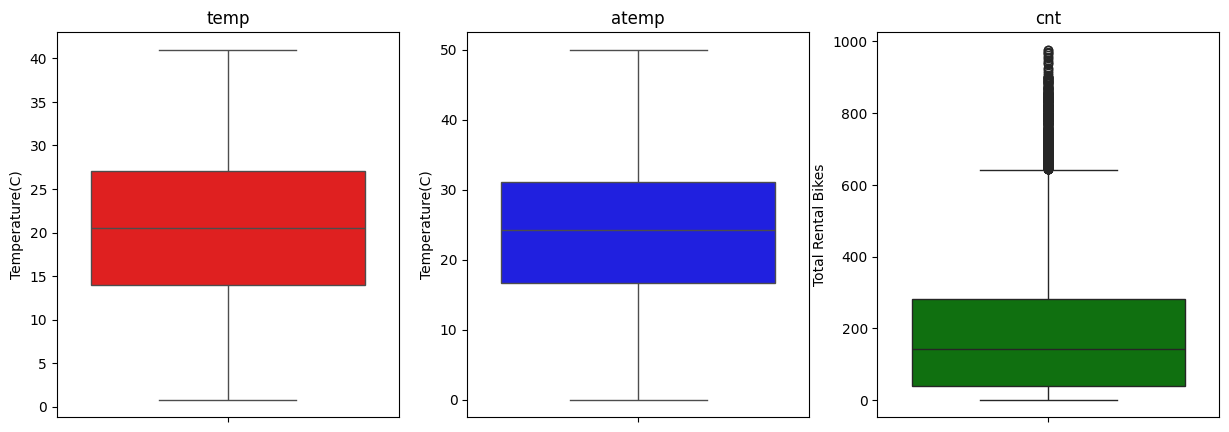

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

#make box plot
sns.boxplot(data=hour_df, y="temp", ax=axs[0], orient="v", color="red")
sns.boxplot(data=hour_df, y="atemp", ax=axs[1], orient="v", color="blue")
sns.boxplot(data=hour_df, y="cnt", ax=axs[2], orient="v", color="green")

#set title
axs[0].set_title("temp")
axs[1].set_title("atemp")
axs[2].set_title("cnt")

#give label
# give label
for i in range(3):
    axs[i].set_ylabel("Temperature(C)")
else:
    axs[i].set_ylabel("Total Rental Bikes")

plt.show()

__Insight__  
- histogram pada data temp dan atemp menunjukkan data terdistribusi normal, sedangkan pada data cnt histogram menunjukkan "right-skeweed".
- boxplot pada data temp dan atemp menunjukkan tidak ada outliers, sedangkan pada data cnt terdapat beberapa outliers 

In [30]:
corr_df.corr()

,cnt,temp,atemp
cnt,1.000000,0.404772,0.400929
temp,0.404772,1.000000,0.987672
atemp,0.400929,0.987672,1.000000


In [31]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cnt     17379 non-null  int64  
 1   temp    17379 non-null  float64
 2   atemp   17379 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 407.4 KB


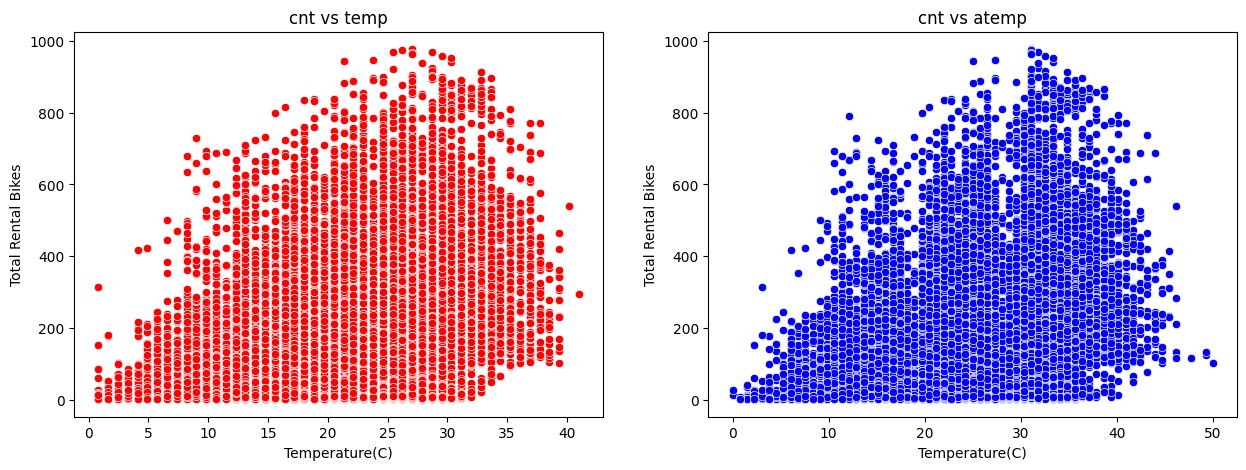

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

#make scatter plot
sns.scatterplot(x='temp', y='cnt', data=corr_df, ax=axs[0], color="red")
sns.scatterplot(x='atemp', y='cnt', data=corr_df, ax=axs[1], color="blue")

#set title
axs[0].set_title("cnt vs temp")
axs[1].set_title("cnt vs atemp")

#give label
for i in range(2):
    axs[i].set_xlabel("Temperature(C)")
    axs[i].set_ylabel("Total Rental Bikes")

plt.show()

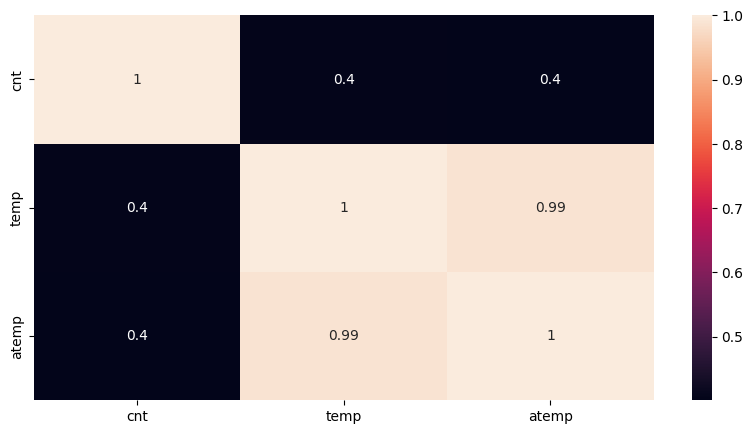

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

__insight__  
terdapat korelasi positif dengan tingkat sedang antara temp dan atemp vs cnt

## 6. Visualization & Explanatory Analysis

Pada tahap ini, hal yang dilakukan adalah membuat visualisasi data untuk menjawab pertanyaan bisnis yang telah ditentukan sebagai berikut :
- Bagaimana peforma Bike Sharing System dalam beberapa tahun terakhir?
- Musim apa yang memiliki nilai pengguna rental sepeda paling tinggi pada Bike Sharing System?
- Apakah ada pengaruh suhu terhadap renta; sepeda pada Bike Sharing System?

### Pertanyaan 1: Bagaimana peforma Bike Sharing System dalam beberapa tahun terakhir?

Untuk menjawab pertanyaan tersebut, maka kita akan melihat banyaknya rental sepeda yang dilakukan beberapa tahun terakhir dengan plot cnt dengan frekuensi bulanan. Maka dari itu, kita harus merubah dari data per-jam menjadi per bulan menggunakan metode resample()

In [34]:
monthly_df = hour_df.resample(rule='M', on='dteday').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt" :"sum"
})
monthly_df.index = monthly_df.index.strftime("%b %y")
monthly_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9960\3385990080.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = hour_df.resample(rule='M', on='dteday').agg({


,casual,registered,cnt
dteday,,,
Jan 11,3073,35116,38189
Feb 11,6242,41973,48215
Mar 11,12826,51219,64045
Apr 11,22346,72524,94870
May 11,31050,104771,135821


In [35]:
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    'dteday':'month',
    'cnt':'total'
}, inplace=True)
monthly_df.head()

,month,casual,registered,total
0,Jan 11,3073,35116,38189
1,Feb 11,6242,41973,48215
2,Mar 11,12826,51219,64045
3,Apr 11,22346,72524,94870
4,May 11,31050,104771,135821


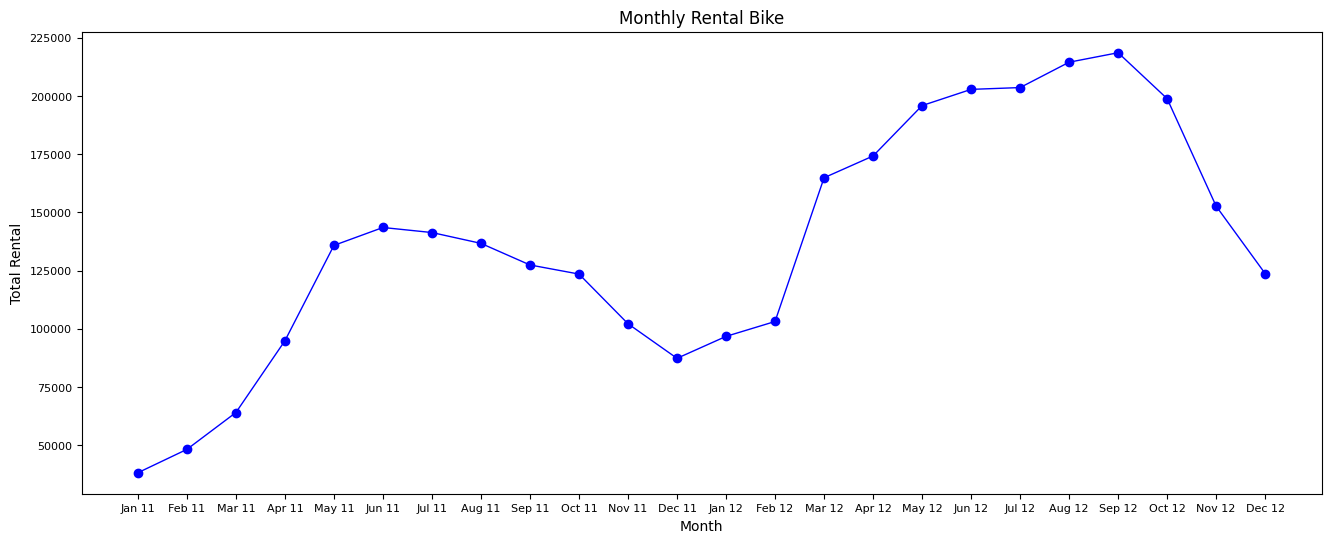

In [36]:
plt.figure(figsize=(16,6))

#plot 
x=monthly_df["month"]
y=monthly_df["total"]
plt.plot(x, y, marker="o", linewidth=1, color="blue")

#Add title, label, and adjust value descr size
plt.title("Monthly Rental Bike")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Month")
plt.ylabel("Total Rental")

#show plot
plt.show()

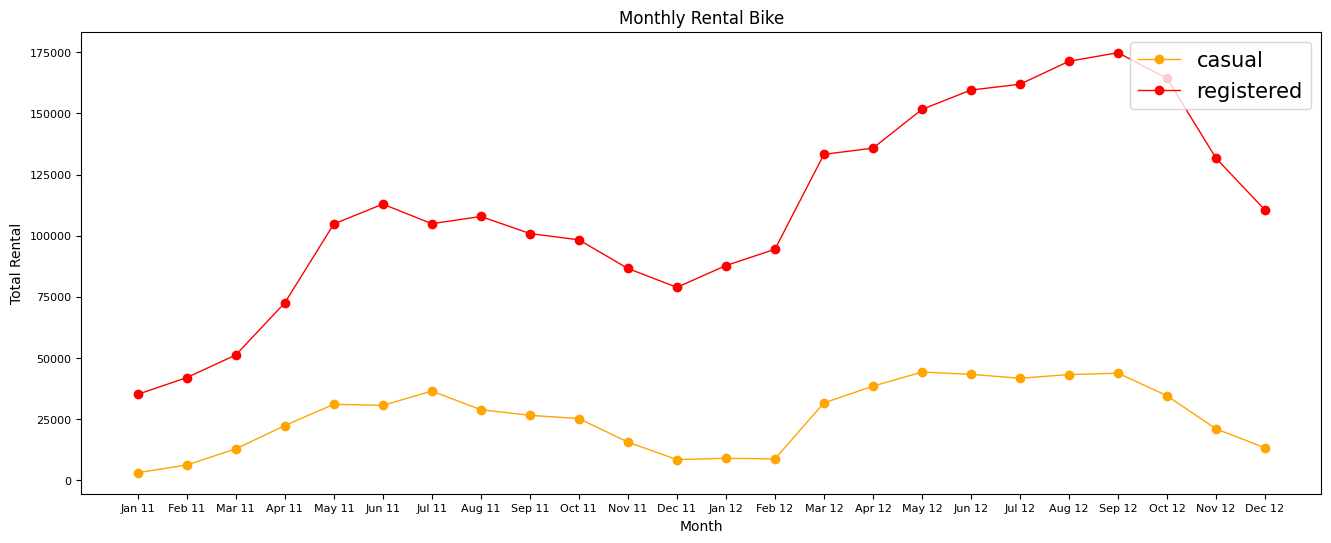

In [37]:
plt.figure(figsize=(16,6))

#plot 
plt.plot(monthly_df["month"], monthly_df["casual"], marker="o", linewidth=1, color="orange", label="casual")
plt.plot(monthly_df["month"], monthly_df["registered"], marker="o", linewidth=1, color="red", label="registered")

#Add title, label, and adjust value descr size
plt.title("Monthly Rental Bike")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Month")
plt.ylabel("Total Rental")

#Add legend
plt.legend(loc='upper right', fontsize=15)

#show plot
plt.show()

__Insight__  
- registered user memiliki nilai yang lebih tinggi daripada casual user, namun memiliki pola yang sama sepanjang bulannya
- total rental pada tahun 2012 lebih tinggi daripada tahun 2011
- puncak dari total rental sepeda terlihat pada pertengahan tahun antara bulan maret sampai september.

### Pertanyaan 2:  Musim apa yang memiliki nilai pengguna rental sepeda paling tinggi pada Bike Sharing System?

In [38]:
season_df = hour_df.groupby(by="season").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt" :"sum"
})
season_df.head()

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [39]:
season_df = season_df.reset_index()
season_df

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


C:\Users\User\AppData\Local\Temp\ipykernel_9960\3574912687.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_df, order=season_order, palette="Set1")


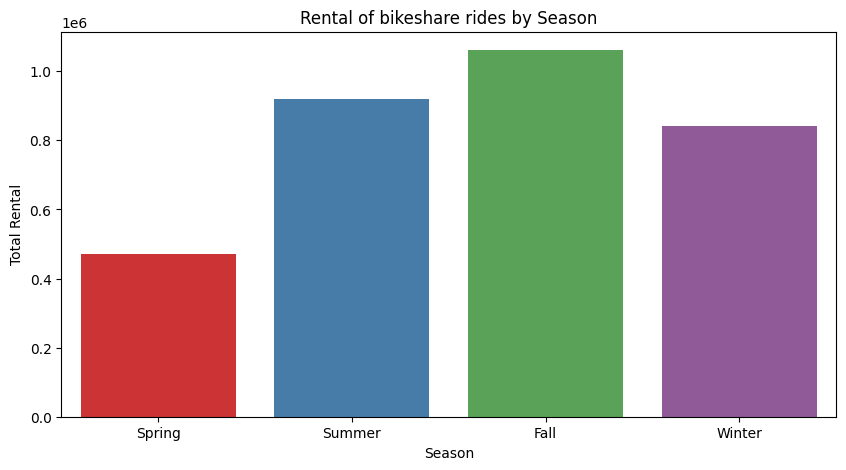

In [40]:
plt.figure(figsize=(10,5))

#barplot
season_order=["Spring", "Summer", "Fall", "Winter"]
sns.barplot(x="season", y="cnt", data=season_df, order=season_order, palette="Set1")

#label and title
plt.xlabel("Season")
plt.ylabel("Total Rental")
plt.title("Rental of bikeshare rides by Season")

plt.show()

__Insight__
- Total Rental paling tinggi saat musim Fall dan paling rendah saat musim Spring

### Pertanyaan 3: Apakah ada pengaruh suhu terhadap total rental sepeda pada Bike Sharing System?

Untuk mengetahui pengaruh suhu terhadap rental sepeda, kita akan coba melakukan scatterplot temp vs cnt dengan membagi kelas sesuai dengan season yang ada yaitu Spring, Summer, Fall, dan Winter

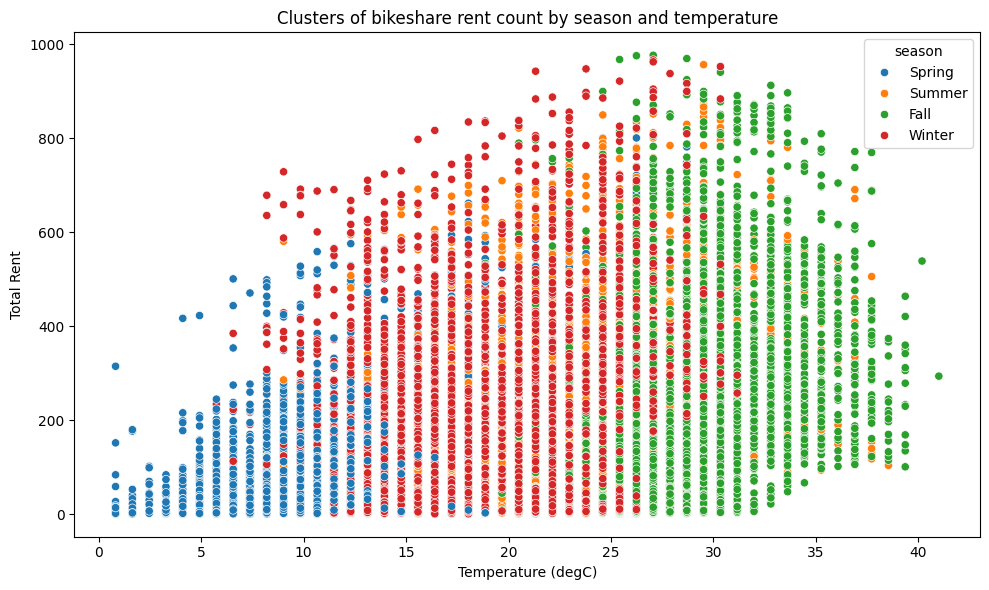

In [62]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rent")
plt.title("Clusters of bikeshare rent count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

__Insight__  
- jika temperature bernilai kecil maka total rent juga bernilai kecil, artinya terdapat hubungan yang linear
- data terdistribusi tidak logis karena musim spring memiliki suhu yang lebih rendah daripada winter. 
- karena tidak dapat disimpulkan maka data akan dicari rata-rata suhu, dan rata-rata total rental dengan rentang setiap bulannya kemudian dicari hubungan antara temperatur dan total rental sepeda menggunakan plot regresi

In [67]:
monthly_temp_df=hour_df.resample(rule="M", on="dteday").agg({
    "temp":"mean",
    "atemp": "mean",
    "cnt" : "mean"
})
monthly_temp_df.index = monthly_temp_df.index.strftime("%b-%y")
monthly_temp_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9960\2456354132.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp_df=hour_df.resample(rule="M", on="dteday").agg({


,temp,atemp,cnt
dteday,,,
Jan-11,8.093924,10.187892,55.507267
Feb-11,11.642989,14.286479,74.291217
Mar-11,13.580548,16.243959,87.732877
Apr-11,19.311627,22.831203,131.947149
May-11,23.666478,27.540679,182.555108


In [70]:
monthly_temp_df = monthly_temp_df.reset_index()
monthly_temp_df.rename(columns={
    'dteday':'month',
    'cnt':'total',
}, inplace=True)
monthly_temp_df.head()

,month,temp,atemp,total
0,Jan-11,8.093924,10.187892,55.507267
1,Feb-11,11.642989,14.286479,74.291217
2,Mar-11,13.580548,16.243959,87.732877
3,Apr-11,19.311627,22.831203,131.947149
4,May-11,23.666478,27.540679,182.555108


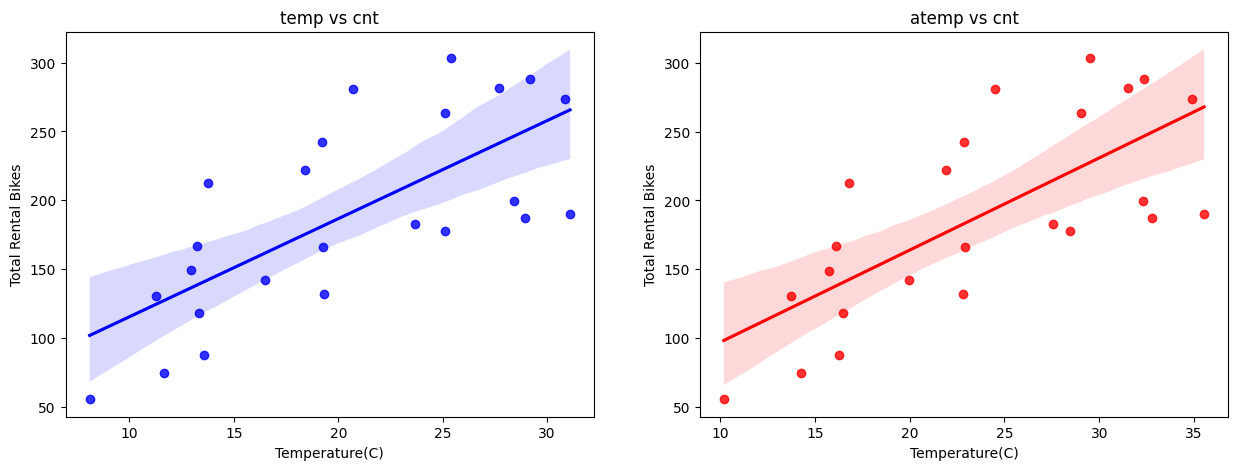

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

#make scatter plot
sns.regplot(x="temp", y="total", ax=axs[0], data=monthly_temp_df, color="blue")
sns.regplot(x="atemp", y="total", ax=axs[1], data=monthly_temp_df, color="red")

#title
axs[0].set_title("temp vs cnt")
axs[1].set_title("atemp vs cnt")

#label
for i in range(2):
    axs[i].set_xlabel("Temperature(C)")
    axs[i].set_ylabel("Total Rental Bikes")

plt.show()

In [52]:
monthly_temp_df.corr(numeric_only=True)

,temp,atemp,total
temp,1.000000,0.999169,0.711876
atemp,0.999169,1.000000,0.717690
total,0.711876,0.717690,1.000000


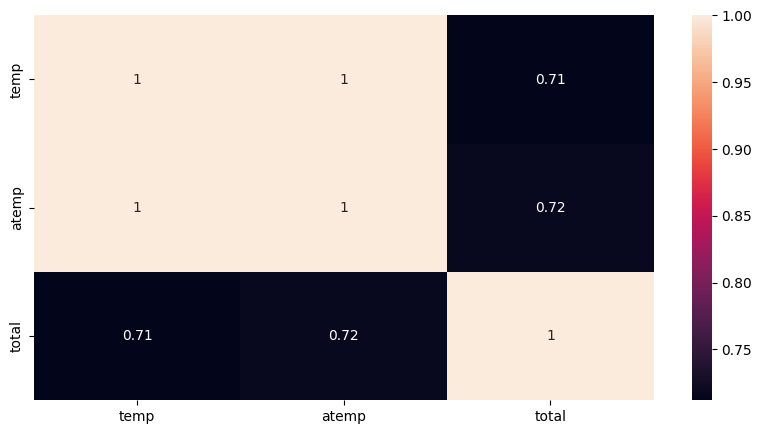

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(monthly_temp_df.corr(numeric_only=True), annot=True)
plt.show()

__Insight__  
Suhu memiliki pengaruh dan korelasi yang kuat terhadap total rental sepeda

## 7. Conclusion

### 7.1 Bagaimana peforma Bike Sharing System dalam beberapa tahun terakhir?


> Banyaknya peminat Bike Sharing System meningkat pada tahun 2012 dari tahun 2011. Pada kedua tahun tersebut puncak peminat memiliki pola yang sama yaitu meningkat pada pertengahan tahun.

### 7.2 Musim apa yang memiliki nilai pengguna rental sepeda paling tinggi pada Bike Sharing System?


> Musim yang memiliki nilai pengguna rental sepeda paling tinggi yaitu pada musim gugur (fall)

### 7.3 Apakah ada pengaruh suhu terhadap total rental sepeda pada Bike Sharing System?

> Suhu berpengaruh dan korelasi kuat terhadap total rental sepeda